In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [3]:
list_agencia= ['ROCA', 'ROCA', 'CARDINALI', 'CARDINALI', 'CARDINALI', 'CARDINALI', 'CARDINALI', 'ROCA', 'CARDINALI', 'CARDINALI', 'ROCA', 'CARDINALI', 'CARDINALI']
list_codigo = [60705, 60252, 116494, 22312, 34120, 74470, 106486, 60142, 23992, 39544, 26457, 15817, 80932]
list_area   = [40, 41, 42, 40, 64, 35, 36, 50, 48, 42, 35, 73, 43]
list_precio = [843, 1015, 1266, 1024, 1228, 1000, 1184, 1171, 1056, 1071, 1112, 1353, 1090]
list_dormit = [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1]

In [4]:
len(list_agencia), len(list_codigo), len(list_area), len(list_dormit)

(13, 13, 13, 13)

In [5]:
data = {'Agencia': list_agencia ,
        'codigo' : list_codigo,
        'Area'   : list_area,
        'precio' : list_precio,
        'dormitorios' : list_dormit,
        }

df = pd.DataFrame(data)

print(df)

      Agencia  codigo  Area  precio  dormitorios
0        ROCA   60705    40     843            1
1        ROCA   60252    41    1015            1
2   CARDINALI  116494    42    1266            1
3   CARDINALI   22312    40    1024            1
4   CARDINALI   34120    64    1228            2
5   CARDINALI   74470    35    1000            1
6   CARDINALI  106486    36    1184            1
7        ROCA   60142    50    1171            1
8   CARDINALI   23992    48    1056            1
9   CARDINALI   39544    42    1071            1
10       ROCA   26457    35    1112            1
11  CARDINALI   15817    73    1353            2
12  CARDINALI   80932    43    1090            1


In [6]:
df['Indicador']= 100*df['Area']/df['precio'] # adding indicator of quality
df

,Agencia,codigo,Area,precio,dormitorios,Indicador
0,ROCA,60705,40,843,1,4.744958
1,ROCA,60252,41,1015,1,4.039409
2,CARDINALI,116494,42,1266,1,3.317536
3,CARDINALI,22312,40,1024,1,3.906250
4,CARDINALI,34120,64,1228,2,5.211726
5,CARDINALI,74470,35,1000,1,3.500000
6,CARDINALI,106486,36,1184,1,3.040541
7,ROCA,60142,50,1171,1,4.269855
8,CARDINALI,23992,48,1056,1,4.545455
9,CARDINALI,39544,42,1071,1,3.921569


In [7]:
df.sort_values(by='Indicador', ascending=True)

,Agencia,codigo,Area,precio,dormitorios,Indicador
6,CARDINALI,106486,36,1184,1,3.040541
10,ROCA,26457,35,1112,1,3.147482
2,CARDINALI,116494,42,1266,1,3.317536
5,CARDINALI,74470,35,1000,1,3.500000
3,CARDINALI,22312,40,1024,1,3.906250
9,CARDINALI,39544,42,1071,1,3.921569
12,CARDINALI,80932,43,1090,1,3.944954
1,ROCA,60252,41,1015,1,4.039409
7,ROCA,60142,50,1171,1,4.269855
8,CARDINALI,23992,48,1056,1,4.545455


<AxesSubplot: xlabel='Agencia', ylabel='Indicador'>

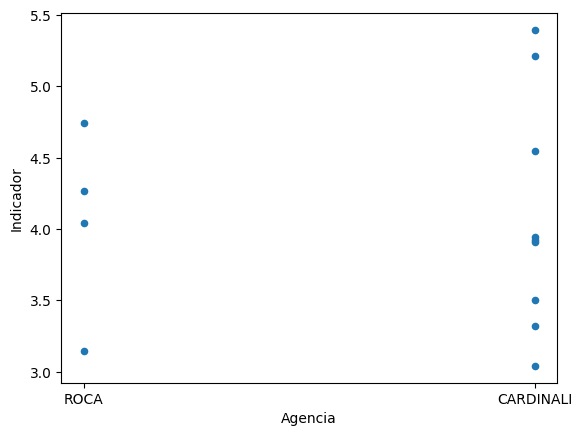

In [8]:
df.plot(y='Indicador', x='Agencia', kind='scatter')

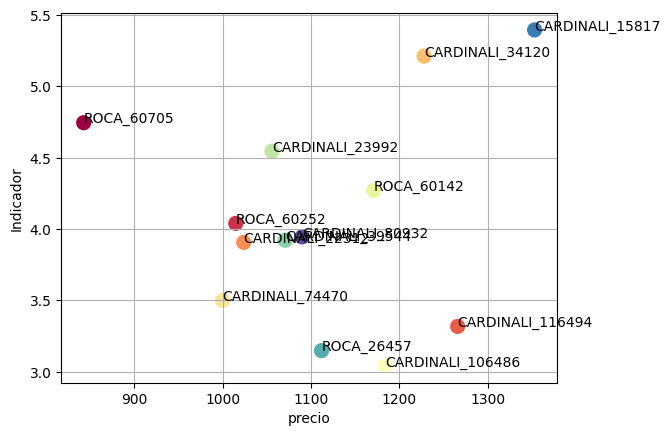

In [9]:
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots()
df.plot( x='precio',y='Indicador', kind='scatter', ax=ax, s=120, linewidth=0, c=range(len(df)), colormap=cmap)
for i, point in df.iterrows():
        ax.text(point['precio'], point['Indicador'], str(point['Agencia'])+'_'+str(point['codigo']))
ax.grid()
#plt.show()
plt.savefig('plot1.png')

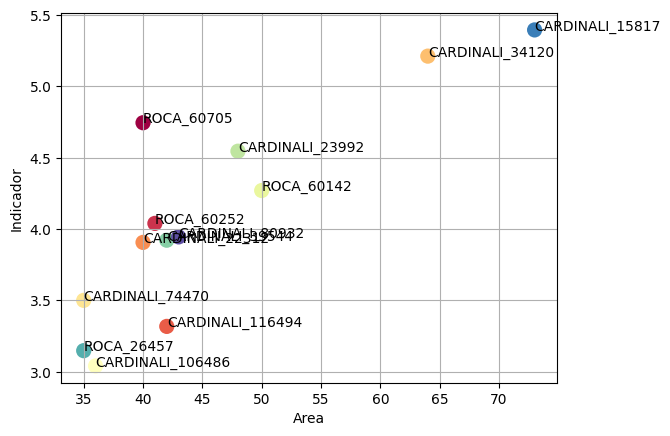

In [10]:
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots()
df.plot( x='Area',y='Indicador', kind='scatter', ax=ax, s=120, linewidth=0, c=range(len(df)), colormap=cmap)
for i, point in df.iterrows():
        ax.text(point['Area'], point['Indicador'], str(point['Agencia'])+'_'+str(point['codigo']))

ax.grid()
plt.savefig('plot2.png')

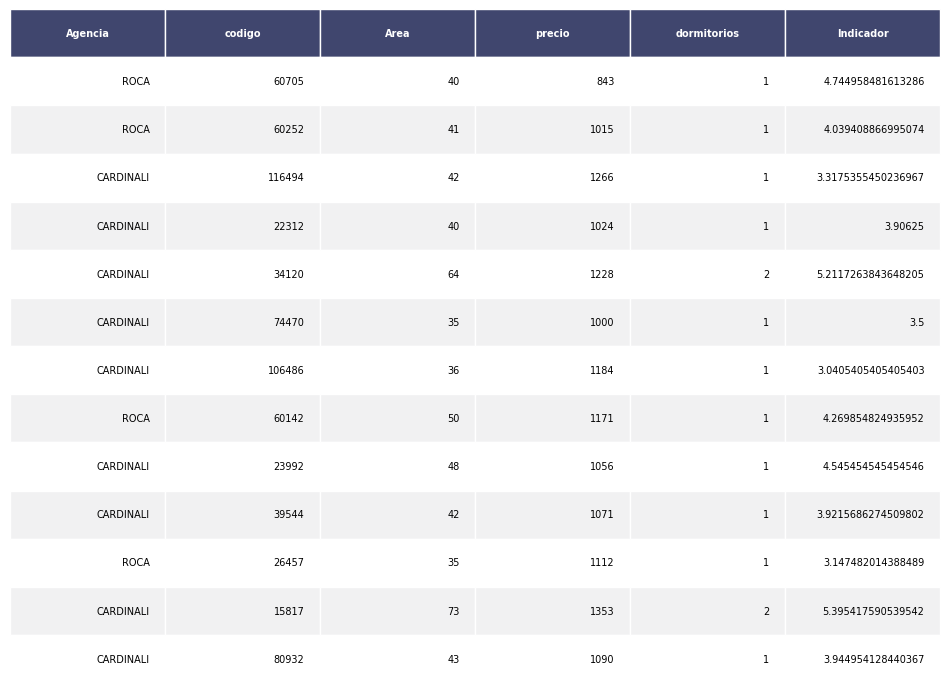

In [16]:
# from https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0, font_size=7)
fig.savefig("table_mpl.png")
